In [5]:
import cv2
video_file='../img/big_buck.avi'
cap = cv2.VideoCapture(video_file)

if cap.isOpened:
    while True:
        ret, img = cap.read()
        if ret:
            print(ret)
            cv2.imshow(video_file,img)
            cv2.waitKey(25)
        else:
            print("d")
            break
else:
    print("못 열어")
    
cap.release()

cv2.destroyAllWindows()


True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


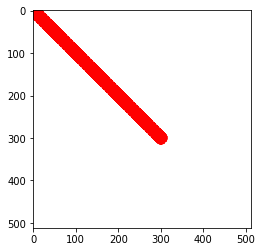

In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = np.full((512,512,3),255,np.uint8)
img = cv2.line(img,(0,0),(300,300),(255,0,0),30,cv2.LINE_AA)

plt.imshow(img)
plt.show()

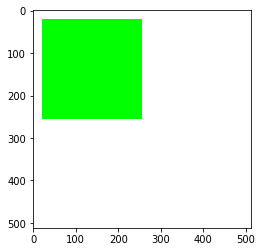

In [31]:
img = np.full((512,512,3),255,np.uint8)
img = cv2.rectangle(img,(20,20),(255,255),(0,255,0),-1)

plt.imshow(img)
plt.show()

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('../img/sunset.jpg')

# roi 좌표 지정
x = 320 
y = 150 
w = 50 
h = 50

roi = img[y:y+h,x:x+w]
cv2.rectangle(roi,(0,0),(h-1,w-1),(0,255,0))

cv2.imshow('img',img)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('../img/sunset.jpg')

# roi 좌표 지정
x = 320 
y = 150 
w = 50 
h = 50

roi = img[y:y+h,x:x+w]
img[y:y+h,x+w:x+w+w]=roi
cv2.rectangle(img,(x,y),(x+w+w,y+h),(0,255,0))
cv2.imshow('img',img)
# cv2.imshow('roi',img2)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [2]:
import cv2
import numpy as np

img = cv2.imread('../img/sunset.jpg')

x,y,w,h= cv2.selectROI('img', img, False)

if w and h:
    roi = img[y:y+h, x:x+w]
    cv2.imshow('cropped', roi) # ROI지정 영역을 새창으로 표시
    cv2.moveWindow('cropped',0,0) # 새창을 화면 좌측 상단에 이동
    cv2.imwrite('cropped2.jpg',roi) # ROI 영역만 파일로 저장
    
cv2.imshow('img', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

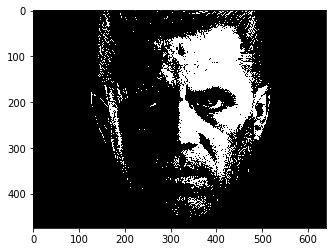

In [5]:
import cv2
 
img = cv2.imread('../img/man_face.jpg', cv2.IMREAD_GRAYSCALE)


ret, t_bin=cv2.threshold(img,127,255,cv2.THRESH_BINARY)
plt.imshow(cv2.cvtColor(t_bin, cv2.COLOR_GRAY2RGB))
plt.show()

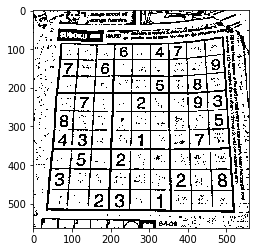

In [6]:
import cv2

image = cv2.imread('../img/sudoku.png', cv2.IMREAD_GRAYSCALE)

th2 = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,21,3)



plt.imshow(cv2.cvtColor(th2, cv2.COLOR_GRAY2RGB))
plt.show()

In [8]:
import cv2

image = cv2.imread('../img/model3.jpg')

#픽셀 수 및 이미지 크기 확인
print(image.shape)
print(image.size)

#이미지 Numpy 객체의 특정 픽셀을 가리킴
px = image[500,100]

#B,G,R 순서로 출력
print(px)

#R값만 출력
print(px[2])

(600, 450, 3)
810000
[228 232 221]
221


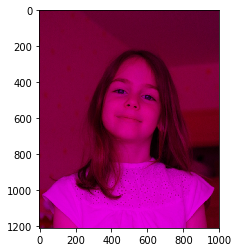

In [11]:
image = cv2.imread('../img/image.jpg')
image[:,:,1]=0

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

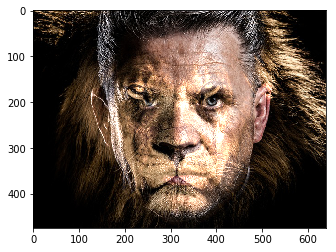

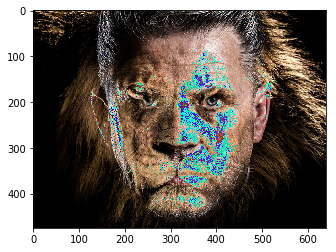

In [13]:
img1 = cv2.imread('../img/man_face.jpg')
img2 = cv2.imread('../img/lion_face.jpg')

result = cv2.add(img1,img2)
plt.imshow(cv2.cvtColor(result,cv2.COLOR_BGR2RGB))
plt.show()

result = img1+img2
plt.imshow(cv2.cvtColor(result,cv2.COLOR_BGR2RGB))
plt.show()

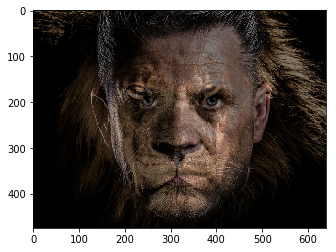

In [14]:
alpha = 0.5

img1 = cv2.imread('../img/man_face.jpg')
img2 = cv2.imread('../img/lion_face.jpg')

dst = cv2.addWeighted(img1, alpha, img2, (1-alpha),0)

plt.imshow(cv2.cvtColor(dst,cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

win_name='Alpha blending'
trackbar_name = 'fade'

def onChange(x):
    alpha =x/100
    dst = cv2.addWeighted(img1,1-alpha,img2,alpha,0)
    cv2.imshow(win_name,dst)
    
img1 = cv2.imread('../img/man_face.jpg')
img2 = cv2.imread('../img/lion_face.jpg')

cv2.imshow(win_name,img1)
cv2.createTrackbar(trackbar_name,win_name,0,100,onChange)

cv2.waitKey()
cv2.destroyAllWindows()
